In [188]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [189]:
df=pd.read_csv('wiki_movie_plots_deduped_cleaned_genre_and_plot.csv')
df

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Genre_updated,Wiki Page,Plot,Plot_cleanned
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,NaN,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",bartender working saloon serving drink custome...
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,NaN,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",moon painted smiling face hang park night youn...
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,NaN,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",film minute long composed two shot first girl ...
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,NaN,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,lasting second consisting two shot first shot ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,NaN,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,earliest known adaptation classic fairytale fi...
...,...,...,...,...,...,...,...,...,...,...
42530,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,NaN,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ...",film begin wxyz world war ended centre around ...
42531,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the...",two musician salih gürkan described adventure ...
42532,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i...",zafer sailor living mother döndü coastal villa...
42533,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...,film centre around young woman named amy tyler...


In [190]:
data1=df[['Plot','Plot_cleanned','Genre_updated']]
data1['Word_count_of_Plot']=data1['Plot_cleanned'].apply(lambda x: len(x.split()))
data1.sort_values(by='Word_count_of_Plot',ascending=False)[:40]

<ipython-input-190-96daee713189>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Word_count_of_Plot']=data1['Plot_cleanned'].apply(lambda x: len(x.split()))


,Plot,Plot_cleanned,Genre_updated,Word_count_of_Plot
40212,After a brief introduction to some of the main...,brief introduction main character story beginn...,NaN,3577
31798,After a brief introduction to some of the main...,brief introduction main character story beginn...,NaN,3577
41679,"The film proceeds in chronological order, apar...",film proceeds chronological order apart scene ...,crime,2800
32365,"The story takes place in Pakistan in 1977, six...",story take place pakistan wxyz six year wxyz b...,war,2669
42252,The opening scene shows a group of illegal imm...,opening scene show group illegal immigrant pre...,NaN,2499
18492,Young mother Madylyn Mabry puts her daughter t...,young mother madylyn mabry put daughter bed hu...,thriller,2423
27508,Bruce Lee (Li Xiao Long) is a high school stud...,bruce lee li xiao long high school student sch...,NaN,2120
27777,The film begins in Seattle. Seattle police off...,film begin seattle seattle police officer mada...,NaN,1904
40428,"The story begins with Teru Aoki (青木 輝), the ma...",story begin teru aoki 青木 輝 main protagonist tr...,NaN,1753
27732,"When Lam Ting-yat was little, his father died ...",lam tingyat little father died raised police o...,crime,1618


In [191]:
data=pd.read_csv("most_frequent_words_200.csv")
data

,Genre,Words,Counts
0,western,town,1144
1,western,men,940
2,western,take,683
3,western,back,672
4,western,one,671
...,...,...,...
5595,anime,tima,35
5596,anime,leaving,34
5597,anime,age,34
5598,anime,destroyed,34


In [192]:
dict_words={i:(data[data['Genre']==i]['Words']).to_list() for i in data['Genre'].unique()}
dict_words

{'western': ['town',
  'men',
  'take',
  'back',
  'one',
  'kill',
  'man',
  'ranch',
  'horse',
  'find',
  'ride',
  'killed',
  'go',
  'gang',
  'return',
  'two',
  'get',
  'gun',
  'sheriff',
  'tell',
  'indian',
  'shoot',
  'father',
  'brother',
  'help',
  'try',
  'woman',
  'gold',
  'new',
  'come',
  'john',
  'gene',
  'train',
  'friend',
  'money',
  'son',
  'cattle',
  'shot',
  'make',
  'way',
  'also',
  'later',
  'escape',
  'time',
  'love',
  'away',
  'life',
  'outlaw',
  'old',
  'wife',
  'leave',
  'war',
  'see',
  'fight',
  'jim',
  'give',
  'order',
  'saloon',
  'dead',
  'wagon',
  'attack',
  'meet',
  'want',
  'billy',
  'daughter',
  'posse',
  'end',
  'however',
  'day',
  'tom',
  'home',
  'run',
  'arrives',
  'turn',
  'bill',
  'army',
  'land',
  'decides',
  'apache',
  'plan',
  'set',
  'leaf',
  'young',
  'death',
  'killing',
  'fort',
  'jack',
  'wxyz',
  'begin',
  'three',
  'night',
  'offer',
  'local',
  'year',
  'mar

In [193]:
def reduce_words(x):
    return ' '.join([i for i in x['Plot_cleanned'].split() if i in  dict_words[x['Genre_updated']]])
     

In [194]:
%%time
Train=df[~pd.isnull(df['Genre_updated'])]
Train[['Genre_updated','Plot_cleanned']][:10].apply(lambda x: reduce_words(x),axis=1)

Wall time: 17 ms


6     two bandit force train order train stop two ba...
7     film family move life thing start go wife get ...
10    leaf begin get start try onto around man help ...
11                      film train two make along later
12                     train two make along later horse
13                      film train two make along later
14                 film train two line make along later
15              father large causing large film another
16    daughter start away set fire daughter return h...
17    game mr several arrives game become game back ...
dtype: object

In [195]:
%%time
Train=df[~pd.isnull(df['Genre_updated'])]
Test=df[pd.isnull(df['Genre_updated'])]


Train['Plot_trimmed']=Train[['Genre_updated','Plot_cleanned']].apply(lambda x: reduce_words(x),axis=1)


Wall time: 1min 25s


<timed exec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [196]:
data1=Train[['Plot','Plot_cleanned','Genre_updated','Plot_trimmed']]
data1['Word_count_of_Plot']=data1['Plot_cleanned'].apply(lambda x: len(x.split()))
data1['Word_count_of_Plot_trimmed']=data1['Plot_trimmed'].apply(lambda x: len(x.split()))
data1.sort_values(by='Word_count_of_Plot_trimmed',ascending=False)[:40]

<ipython-input-196-b91bf72473e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Word_count_of_Plot']=data1['Plot_cleanned'].apply(lambda x: len(x.split()))
<ipython-input-196-b91bf72473e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Word_count_of_Plot_trimmed']=data1['Plot_trimmed'].apply(lambda x: len(x.split()))


,Plot,Plot_cleanned,Genre_updated,Plot_trimmed,Word_count_of_Plot,Word_count_of_Plot_trimmed
18492,Young mother Madylyn Mabry puts her daughter t...,young mother madylyn mabry put daughter bed hu...,thriller,young mother daughter husband jack around stay...,2423,814
41679,"The film proceeds in chronological order, apar...",film proceeds chronological order apart scene ...,crime,film order scene first taken wxyz film begin w...,2800,682
32365,"The story takes place in Pakistan in 1977, six...",story take place pakistan wxyz six year wxyz b...,war,story take place wxyz year wxyz war take place...,2669,639
28609,Kenji Delos Reyes delivers a speech during the...,kenji delos reyes delivers speech wedding rece...,teen,kenji college friend however kenneth kenji ’ m...,1210,619
28424,The film is based on selected chapters of Wu C...,film based selected chapter wu chengens classi...,martial_arts,film wu tell wukong jade emperor heaven film o...,1353,570
27732,"When Lam Ting-yat was little, his father died ...",lam tingyat little father died raised police o...,crime,father police officer son brother become polic...,1618,557
26915,The film is based on selected chapters of Wu C...,film based selected chapter wu chengens classi...,fantasy,film tell story wukong heaven film demon king ...,1353,527
28423,The film is based on selected chapters of Wu C...,film based selected chapter wu chengens classi...,fantasy,film tell story wukong heaven film demon king ...,1353,527
26390,The main objective of the film was to explain ...,main objective film explain story behind rock ...,documentary,main film story alice film start furnier later...,1385,499
27631,The film is set during the transition period b...,film set transition period sui dynasty tang dy...,martial_arts,film set tang open shaolin temple temple monk ...,1107,462


In [197]:
%%time

X_train=Train['Plot_trimmed']
y_train=Train['Genre_updated']


X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=123,stratify=y_train)


X_test=Test['Plot_cleanned']
y_test=Test['Genre_updated']

Wall time: 32.9 ms


In [198]:
%%time
tfidf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,2))

X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 

X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) 


X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

Wall time: 4.89 s


In [199]:
X_train_vectors_tfidf.shape,X_val_vectors_tfidf.shape,X_test_vectors_tfidf.shape,

((24984, 152312), (10708, 152312), (6843, 152312))

In [200]:
%%time
# random forest
rf = RandomForestClassifier(n_estimators=100,random_state=123,n_jobs=-1)
rf.fit(X_train_vectors_tfidf, y_train) 

Wall time: 48.8 s


RandomForestClassifier(n_jobs=-1, random_state=123)

In [201]:
#Predict y value for test dataset 
y_pred=rf.predict(X_val_vectors_tfidf)

In [202]:
print(classification_report(y_val,y_pred))
print('Confusion Matrix:',confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

      action       0.75      0.66      0.70       742
   adventure       0.81      0.57      0.67       260
    animated       0.84      0.75      0.79       269
       anime       0.25      0.02      0.04        43
   biography       0.92      0.09      0.16       137
      comedy       0.72      0.80      0.76      2188
       crime       0.71      0.60      0.65       481
 documentary       1.00      0.08      0.14        39
       drama       0.57      0.93      0.71      2854
      family       0.31      0.05      0.08       191
     fantasy       0.75      0.39      0.51       164
  historical       0.44      0.08      0.14        86
      horror       0.93      0.82      0.87       476
martial_arts       1.00      0.65      0.79        40
     musical       0.84      0.40      0.54       288
     mystery       0.79      0.26      0.39       144
        noir       0.50      0.03      0.05       107
     romance       0.84    

In [203]:
rf.predict_proba(X_test_vectors_tfidf)

array([[0.06      , 0.02      , 0.08      , ..., 0.18      , 0.        ,
        0.1       ],
       [0.06129167, 0.01      , 0.15      , ..., 0.06496429, 0.        ,
        0.00214286],
       [0.04068966, 0.        , 0.02      , ..., 0.06204101, 0.05      ,
        0.08226468],
       ...,
       [0.06      , 0.01      , 0.02      , ..., 0.04      , 0.        ,
        0.        ],
       [0.01      , 0.09      , 0.05      , ..., 0.01      , 0.03      ,
        0.08      ],
       [0.04      , 0.08      , 0.01      , ..., 0.07      , 0.19      ,
        0.01      ]])

In [204]:
rf.classes_

array(['action', 'adventure', 'animated', 'anime', 'biography', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'historical',
       'horror', 'martial_arts', 'musical', 'mystery', 'noir', 'romance',
       'sci_fi', 'serial', 'short', 'social', 'sports', 'spy', 'teen',
       'thriller', 'war', 'western'], dtype=object)

In [205]:
dx=pd.DataFrame(rf.predict_proba(X_test_vectors_tfidf),columns=rf.classes_)

In [206]:
dx

,action,adventure,animated,anime,biography,comedy,crime,documentary,drama,family,...,sci_fi,serial,short,social,sports,spy,teen,thriller,war,western
0,0.060000,0.02,0.08,0.00,0.04,0.110000,0.080000,0.01,0.030000,0.010000,...,0.05,0.01,0.02,0.01,0.0,0.00,0.00,0.180000,0.00,0.100000
1,0.061292,0.01,0.15,0.04,0.01,0.029702,0.021583,0.00,0.186780,0.001286,...,0.05,0.00,0.04,0.00,0.0,0.00,0.00,0.064964,0.00,0.002143
2,0.040690,0.00,0.02,0.00,0.16,0.037847,0.032116,0.00,0.163197,0.000615,...,0.01,0.01,0.04,0.00,0.0,0.06,0.00,0.062041,0.05,0.082265
3,0.030000,0.01,0.09,0.00,0.05,0.020000,0.090000,0.01,0.070000,0.000000,...,0.06,0.00,0.00,0.01,0.0,0.00,0.00,0.040000,0.01,0.300000
4,0.060000,0.05,0.09,0.00,0.01,0.100000,0.020000,0.04,0.170000,0.010000,...,0.05,0.00,0.08,0.00,0.0,0.00,0.01,0.060000,0.02,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6838,0.016000,0.11,0.00,0.00,0.00,0.100000,0.000000,0.01,0.594000,0.000000,...,0.00,0.01,0.00,0.00,0.0,0.00,0.00,0.060000,0.00,0.000000
6839,0.002500,0.08,0.01,0.00,0.00,0.240000,0.005000,0.00,0.247500,0.045000,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.030000,0.03,0.110000
6840,0.060000,0.01,0.02,0.00,0.05,0.110000,0.100000,0.02,0.240000,0.070000,...,0.02,0.00,0.04,0.04,0.0,0.00,0.00,0.040000,0.00,0.000000
6841,0.010000,0.09,0.05,0.00,0.00,0.160000,0.000000,0.03,0.245000,0.045000,...,0.05,0.00,0.01,0.00,0.0,0.00,0.00,0.010000,0.03,0.080000


In [207]:
def convert(x):
    if x>0.08:
        return 1
    return 0
    
for i in dx.columns:
    dx[i]=dx[i].apply(lambda x:convert(x))


In [208]:
dx.sum(axis=1).value_counts()

3    2575
4    2355
5     845
2     836
6     162
1      56
7      14
dtype: int64

In [209]:
dx

,action,adventure,animated,anime,biography,comedy,crime,documentary,drama,family,...,sci_fi,serial,short,social,sports,spy,teen,thriller,war,western
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6838,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6839,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6840,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6841,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
def genre_pred(col,x):

    if x==1:
        return col

for i in dx.columns:

    dx[i]=dx[i].apply(lambda x:genre_pred(i,x))

In [211]:
dx_list=dx.to_numpy().tolist()

In [212]:
[i for i in dx_list[0] if i]

['comedy', 'horror', 'thriller', 'western']

In [213]:
Test['Genre_pred']=dx_list

<ipython-input-213-1e867a2d28ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Genre_pred']=dx_list


In [215]:
Test['Genre_pred']=Test['Genre_pred'].apply(lambda x:[i for i in x if i])

<ipython-input-215-5d7dce274ac8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Genre_pred']=Test['Genre_pred'].apply(lambda x:[i for i in x if i])


In [216]:
Test

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Genre_updated,Wiki Page,Plot,Plot_cleanned,Genre_pred
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,NaN,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",bartender working saloon serving drink custome...,"[comedy, horror, thriller, western]"
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,NaN,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",moon painted smiling face hang park night youn...,"[animated, drama, romance]"
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,NaN,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",film minute long composed two shot first girl ...,"[biography, drama, horror, western]"
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,NaN,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,lasting second consisting two shot first shot ...,"[animated, crime, horror, western]"
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,NaN,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,earliest known adaptation classic fairytale fi...,"[animated, comedy, drama, fantasy]"
...,...,...,...,...,...,...,...,...,...,...,...
42482,2009,Orada,Turkish,Unknown,NaN,unknown,NaN,https://en.wikipedia.org/wiki/Orada,When the matriarch of an Istanbul family dies ...,matriarch istanbul family dy home elderly son ...,"[adventure, comedy, drama]"
42527,2014,Mandıra Filozofu,Turkish,Director: Müfit Can Saçıntı,Director: Müfit Can Saçıntı\r\nCast: Rasim Özt...,unknown,NaN,https://en.wikipedia.org/wiki/Mand%C4%B1ra_Fil...,Cavit an ambitious industralist in İstanbul pl...,cavit ambitious industralist i̇stanbul plan bu...,"[comedy, drama, romance, western]"
42528,2014,Winter Sleep,Turkish,Director: Nuri Bilge Ceylan,Director: Nuri Bilge Ceylan\r\nCast: Haluk Bil...,unknown,NaN,https://en.wikipedia.org/wiki/Winter_Sleep_(film),"Aydın, a former actor, owns a mountaintop hote...",aydın former actor owns mountaintop hotel capp...,"[comedy, crime, drama]"
42529,2014,Sivas,Turkish,Director: Kaan Müjdeci,Director: Kaan Müjdeci\r\nCast: Dogan Izci,unknown,NaN,https://en.wikipedia.org/wiki/Sivas_(film),The film follows an eleven-year-old boy named ...,film follows elevenyearold boy named aslan dog...,"[adventure, comedy, drama]"


### pipeline 


In [17]:
from sklearn.pipeline import Pipeline

In [24]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                     ('clf', RandomForestClassifier(n_estimators = 100,random_state=123,n_jobs=-1))])

In [25]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_jobs=-1, random_state=123))])

In [26]:
#Predict y value for test dataset 
y_pred=text_clf.predict(X_val)
print(classification_report(y_val,y_pred))
print('Confusion Matrix:',confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

      action       0.79      0.77      0.78       742
   adventure       0.81      0.63      0.71       260
    animated       0.80      0.78      0.79       269
       anime       0.78      0.16      0.27        43
   biography       0.98      0.37      0.54       137
      comedy       0.78      0.86      0.82      2188
       crime       0.73      0.72      0.73       481
 documentary       1.00      0.10      0.19        39
       drama       0.70      0.95      0.80      2854
      family       0.88      0.40      0.55       191
     fantasy       0.84      0.56      0.67       164
  historical       0.61      0.20      0.30        86
      horror       0.92      0.87      0.89       476
martial_arts       1.00      0.55      0.71        40
     musical       0.91      0.62      0.74       288
     mystery       0.78      0.28      0.41       144
        noir       0.83      0.09      0.17       107
     romance       0.86    

In [27]:
text_clf = Pipeline([
                     ('tfidf', TfidfVectorizer(use_idf=True)),
                     ('clf', RandomForestClassifier(n_estimators = 100,random_state=123,n_jobs=-1))])
text_clf.fit(X_train,y_train)
#Predict y value for test dataset 
y_pred=text_clf.predict(X_val)
print(classification_report(y_val,y_pred))
print('Confusion Matrix:',confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

      action       0.79      0.77      0.78       742
   adventure       0.81      0.63      0.71       260
    animated       0.80      0.78      0.79       269
       anime       0.78      0.16      0.27        43
   biography       0.98      0.37      0.54       137
      comedy       0.78      0.86      0.82      2188
       crime       0.73      0.72      0.73       481
 documentary       1.00      0.10      0.19        39
       drama       0.70      0.95      0.80      2854
      family       0.88      0.40      0.55       191
     fantasy       0.84      0.56      0.67       164
  historical       0.61      0.20      0.30        86
      horror       0.92      0.87      0.89       476
martial_arts       1.00      0.55      0.71        40
     musical       0.91      0.62      0.74       288
     mystery       0.78      0.28      0.41       144
        noir       0.83      0.09      0.17       107
     romance       0.86    

### Text Clustering

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=400)

In [10]:
data=Train[['Genre_updated','Plot_trimmed']]
data['Genre_updated'].nunique()




28

In [11]:
data_points=vect.fit_transform(data['Plot_trimmed'].to_list())

In [12]:
data_points.shape

(35692, 400)

In [13]:
#using all processes jobs=-1 and k means++ for starting initilization advantage
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 28,init='k-means++', n_jobs = -1,random_state=99)
model.fit(data_points)

D:\Applications\Anaconda3\envs\py\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=28, n_jobs=-1, random_state=99)

In [14]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [15]:
cluster_center

array([[0.04050405, 0.03150315, 0.03060306, ..., 0.1260126 , 0.29342934,
        0.00090009],
       [0.03035413, 0.05564924, 0.04890388, ..., 0.02698145, 0.42833052,
        0.153457  ],
       [0.02437609, 0.02611724, 0.07515961, ..., 0.26987812, 0.41671503,
        0.0034823 ],
       ...,
       [0.04731861, 0.17350158, 0.02523659, ..., 0.12302839, 0.55835962,
        0.04100946],
       [0.2       , 0.        , 0.        , ..., 0.        , 0.04444444,
        0.        ],
       [0.        , 0.03296703, 0.10989011, ..., 0.23076923, 0.36263736,
        0.02197802]])

In [16]:
data['label'] = model.labels_ 

<ipython-input-16-f24f48a02fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = model.labels_


In [17]:
from sklearn import metrics
silhouette_score= metrics.silhouette_score(data_points, labels, metric='euclidean')
silhouette_score

0.04948580242727385

In [18]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

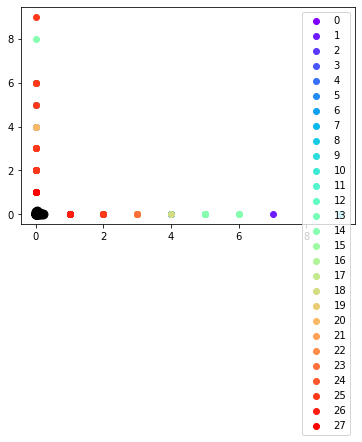

<Figure size 3600x3600 with 0 Axes>

In [19]:
#Getting the Centroids
centroids = cluster_center
u_labels = np.unique(labels)
 
#plotting the results:
colors = cm.rainbow(np.linspace(0, 1, 28))



for i,c in zip(u_labels,colors):
    plt.scatter(data_points[labels == i , 0].toarray() , data_points[labels == i , 1].toarray(), label = i,color=c)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')



plt.legend()

plt.figure(figsize=(50, 50))
plt.show()


In [20]:
data[data['label']==1].head(30)


,Genre_updated,Plot_trimmed,label
41,drama,set old war story begin house join begin three...,1
212,comedy,family mr fall several later find still room b...,1
622,horror,film open new house john brother visit room ma...,1
650,mystery,letter police stop murder leaf note police car...,1
651,thriller,police stop murder leaf police car found dead ...,1
792,romance,letter return home man doctor month live decid...,1
793,drama,return home man doctor live decides marry daug...,1
1016,mystery,private see body family friend call private de...,1
1026,comedy,run company named one old john wife way meet o...,1
1259,drama,film tell story dr doctor man good one party h...,1


In [ ]:
Spacy, Fasttext